<a href="https://colab.research.google.com/github/ajith18thayil/My-WorkS/blob/main/abcnewsNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('abcnews-date-text.csv1',usecols=['headline_text'],nrows=2000)
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
text=data.headline_text
text

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
1995       foreign donations ok for brisbane based senate
1996    former mayor speaks out over mismanagement rep...
1997    fraser shares lead as wind sweeps adelaide course
1998                   fuel prices tipped to jump further
1999            gardens in the sky wins comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
text=text.str.replace('^[a-zA-Z0-9]+',' ')
text

<ipython-input-64-c8a78c0dedae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text=text.str.replace('^[a-zA-Z0-9]+',' ')


0         decides against community broadcasting licence
1             fire witnesses must be aware of defamation
2           g calls for infrastructure protection summit
3                   nz staff in aust strike for pay rise
4              nz strike to affect australian travellers
                              ...                       
1995              donations ok for brisbane based senate
1996         mayor speaks out over mismanagement reports
1997          shares lead as wind sweeps adelaide course
1998                       prices tipped to jump further
1999                   in the sky wins comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
import nltk
nltk.download('punkt')
stemmer=SnowballStemmer('english')
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text=text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
text

0          decid communiti broadcast licenc
1                  fire wit must awar defam
2       g call infrastructur protect summit
3             nz staff aust strike pay rise
4        nz strike affect australian travel
                       ...                 
1995            donat ok brisban base senat
1996            mayor speak mismanag report
1997    share lead wind sweep adelaid cours
1998                         price tip jump
1999                  sky win comp wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
text=text.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x))   # to remove words of length less than 3 letters 
text

0          decid communiti broadcast licenc
1                  fire wit must awar defam
2         call infrastructur protect summit
3                staff aust strike pay rise
4           strike affect australian travel
                       ...                 
1995               donat brisban base senat
1996            mayor speak mismanag report
1997    share lead wind sweep adelaid cours
1998                         price tip jump
1999                  sky win comp wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(text)

In [ ]:
print(data_vec)

  (0, 1389)	0.5041274974003449
  (0, 340)	0.5041274974003449
  (0, 527)	0.4575535493986924
  (0, 664)	0.5313715104918487
  (1, 669)	0.477211092238317
  (1, 207)	0.4962385380529898
  (1, 1567)	0.4401978053441139
  (1, 2644)	0.477211092238317
  (1, 945)	0.3232837026679231
  (2, 2322)	0.5239566029925601
  (2, 1852)	0.4773184954044788
  (2, 1229)	0.5772896557357144
  (2, 384)	0.4054296307694366
  (3, 2005)	0.39557140067833524
  (3, 1719)	0.4265058079142702
  (3, 2294)	0.463474597566233
  (3, 194)	0.48166238964902836
  (3, 2254)	0.463474597566233
  (4, 2459)	0.5067620642176995
  (4, 196)	0.5203301250248742
  (4, 77)	0.4952904322607213
  (4, 2294)	0.47658803905721653
  (5, 1304)	0.4849106897570401
  (5, 2475)	0.5631422289444903
  (5, 2636)	0.3613907620820073
  :	:
  (1994, 290)	0.5129775011370382
  (1994, 1048)	0.48667656952764826
  (1994, 1645)	0.48667656952764826
  (1995, 2105)	0.530306083517534
  (1995, 240)	0.530306083517534
  (1995, 336)	0.42944674374448216
  (1995, 760)	0.5031166960615

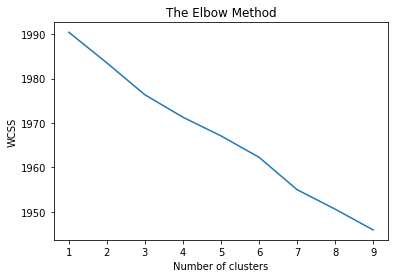

In [ ]:
#init==>to select initial centroid
import matplotlib.pyplot as plt
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
  kmeans.fit(data_vec)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=0)
y=kmeans.fit_predict(data_vec)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
data['cluster']=y
data

,headline_text,cluster
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,0
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0
...,...,...
1995,foreign donations ok for brisbane based senate,0
1996,former mayor speaks out over mismanagement rep...,0
1997,fraser shares lead as wind sweeps adelaide course,0
1998,fuel prices tipped to jump further,0


In [ ]:
data['cluster'].value_counts()

0    1782
2      47
3      43
5      41
1      32
6      28
4      27
Name: cluster, dtype: int64